Populating the interactive namespace from numpy and matplotlib


C:\Users\mvp33\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\mvp33\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


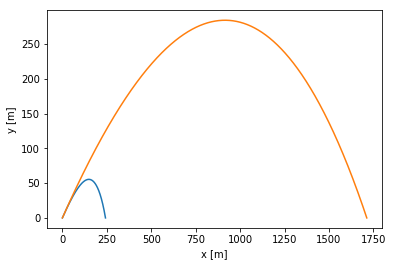

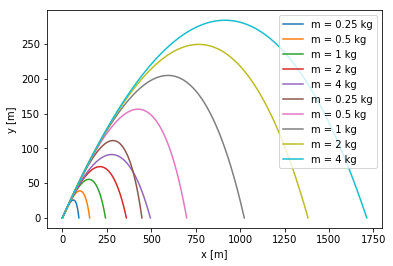

In [11]:
# start from Example 9.5 program odesim.py
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# constants
g_Earth     = 9.81 # m s^-2
g_Mars = 3.71 #m/s^2
m     = 1.0 # kg
rho_Earth   = 1.22 # kg m^-3
rho_Mars = 0.20 #kg/m^3
C     = 0.47 # unitless
R     = 0.08    # m
h     = 0.001   # seconds
theta = 30.0*(np.pi/180) # radians
v0    = 100.0	# m s^0


# define the equations of motion
def f(r,c,g):
    x   = r[0]
    y   = r[1]
    vx  = r[2]
    vy  = r[3]
    fx  = vx
    fy  = vy
    fvx = -c*vx*np.sqrt(vx**2+vy**2)
    fvy = -g-c*vy*np.sqrt(vx**2+vy**2)
    return np.array([fx,fy,fvx,fvy],float)

def Runge_Kutta(g,rho):
    global m
    const = (rho*C*np.pi*R**2)/(2.0*m)
    # containers for output
    r = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
    xpoints = []
    ypoints = []

    # use fourth-order Runge-Kutta
    while r[1]>=0:
        k1 = h*f(r,const,g)
        k2 = h*f(r+0.5*k1,const,g)
        k3 = h*f(r+0.5*k2,const,g)
        k4 = h*f(r+k3,const,g)
        r += (k1+2*k2+2*k3+k4)/6
        xpoints.append(r[0])
        ypoints.append(r[1])

    # make plot for part (b)
    p1 = plt.figure(1)
    plt.plot(xpoints,ypoints)
    plt.xlabel("x [m]")
    plt.ylabel('y [m]')
    p1.show()

    # try different values of m
    p2 = plt.figure(2)
    for m in [0.25,0.5,1,2,4]:
        const = (rho*C*np.pi*R**2)/(2.0*m)
        r = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
        xpoints = []
        ypoints = []

        # use fourth-order Runge-Kutta
        while r[1]>=0:
            k1 = h*f(r,const,g)
            k2 = h*f(r+0.5*k1,const,g)
            k3 = h*f(r+0.5*k2,const,g)
            k4 = h*f(r+k3,const,g)
            r += (k1+2*k2+2*k3+k4)/6
            xpoints.append(r[0])
            ypoints.append(r[1])

        plt.plot(xpoints,ypoints,label='m = '+str(m)+' kg')

    plt.xlabel("x [m]")
    plt.ylabel('y [m]')
    plt.legend()
    p2.show()
    
Runge_Kutta(g_Earth,rho_Earth)
Runge_Kutta(g_Mars,rho_Mars)